In [1]:
threads = -1

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer,\
    plot_confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier

from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import SMOTE

<h1>EDA

In [2]:
s_tel = pd.read_csv('data/s_tel.csv')
s_tel.drop(['phone number','area code'],axis=1,inplace=True)
s_tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   object 
 3   voice mail plan         3333 non-null   object 
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

In [3]:
s_tel.churn = s_tel.churn.apply(int)
s_tel.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

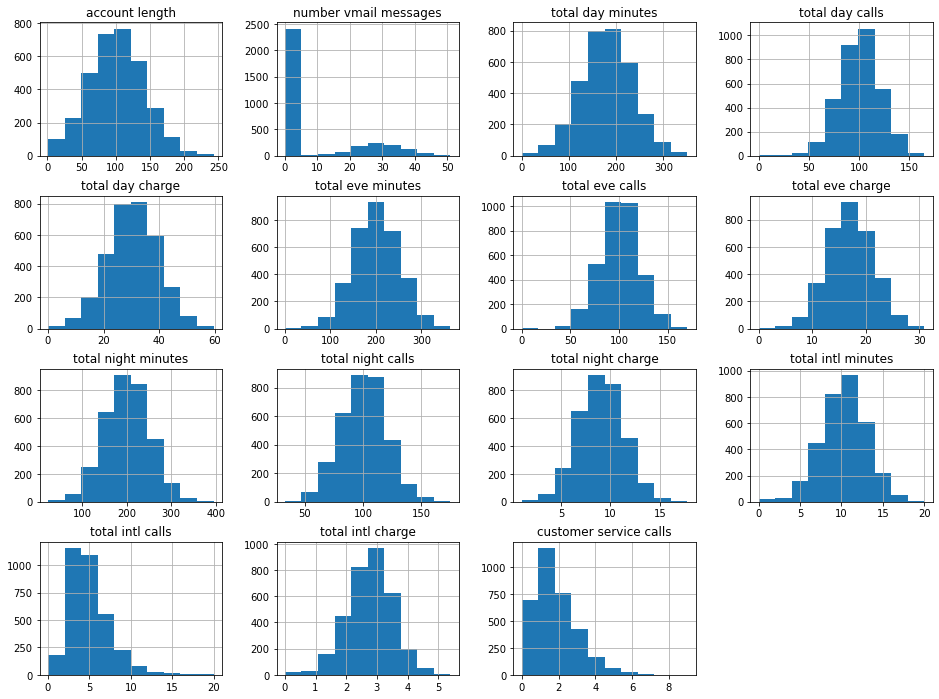

In [4]:
pd.plotting.hist_frame(s_tel.drop('churn',axis=1),figsize=(16,12));

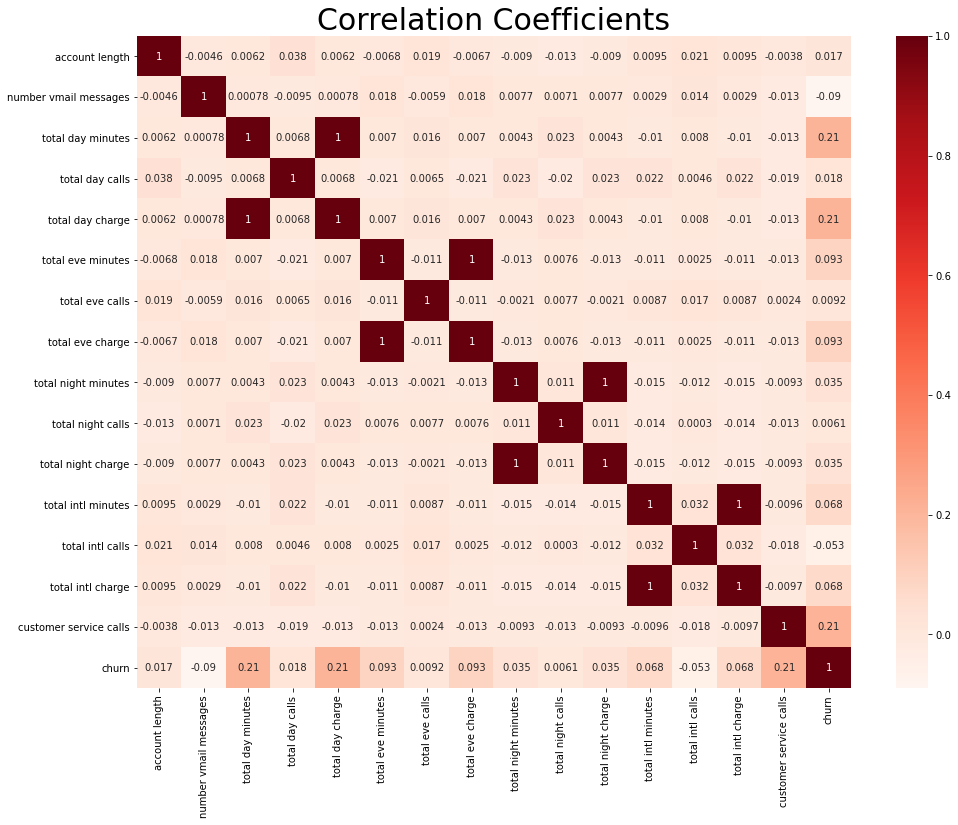

In [5]:
fig,ax = plt.subplots(figsize = (16,12))
ax.set_title('Correlation Coefficients',fontsize=30);
sns.heatmap(s_tel.corr(),annot=True,ax=ax,cmap='Reds');

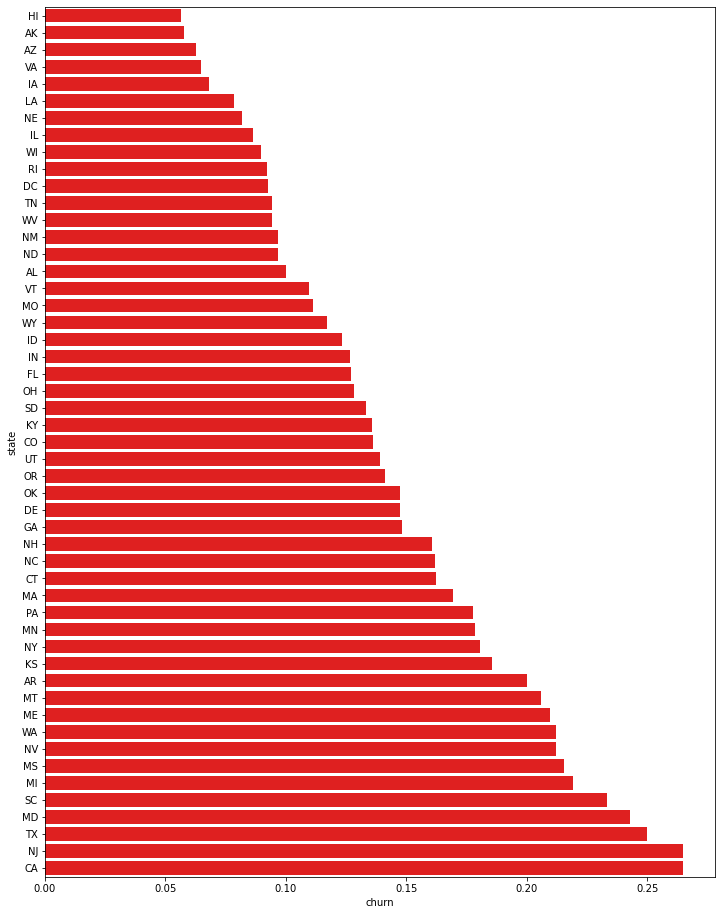

In [6]:
states = s_tel.groupby('state').churn.agg(np.mean)
states.sort_values(ascending=True, inplace=True)
fig,ax = plt.subplots(figsize=(12,16))
sns.barplot(x=states,y=states.index,ax=ax,color='red');

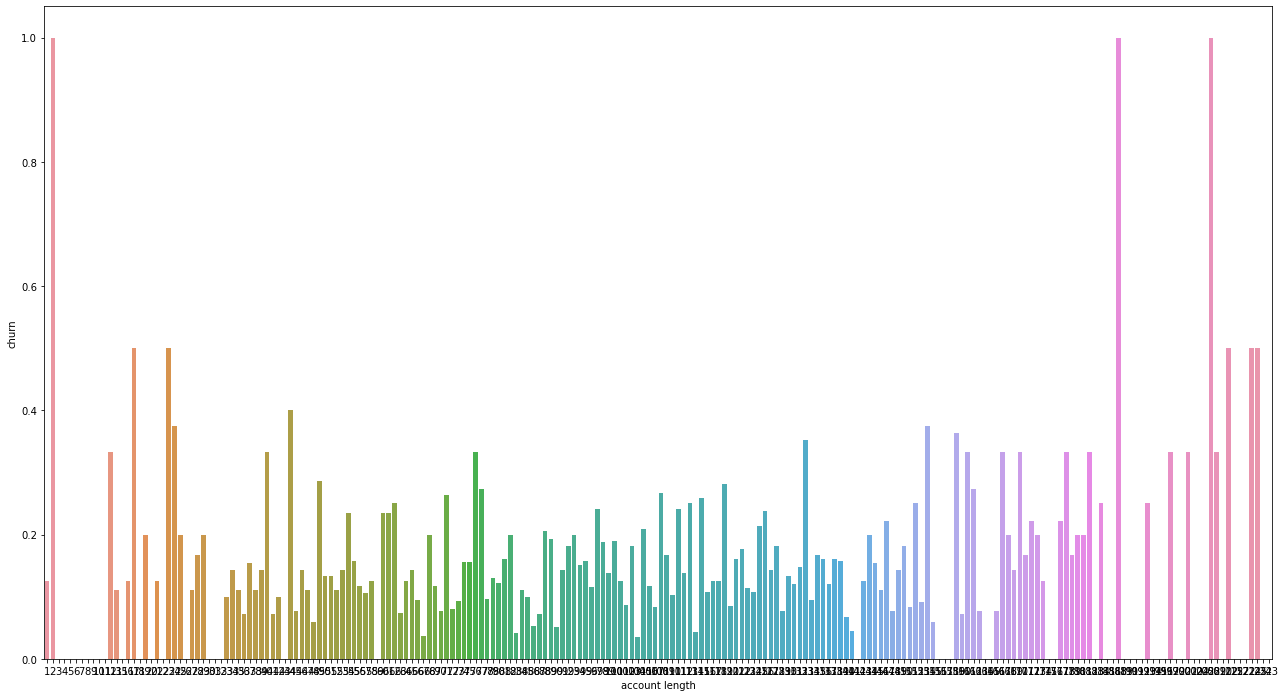

In [7]:
a_len = s_tel.groupby('account length')['churn'].agg(np.mean)
fig,ax = plt.subplots(figsize = (22,12))
sns.barplot(x=a_len.index,y=a_len,ax=ax);

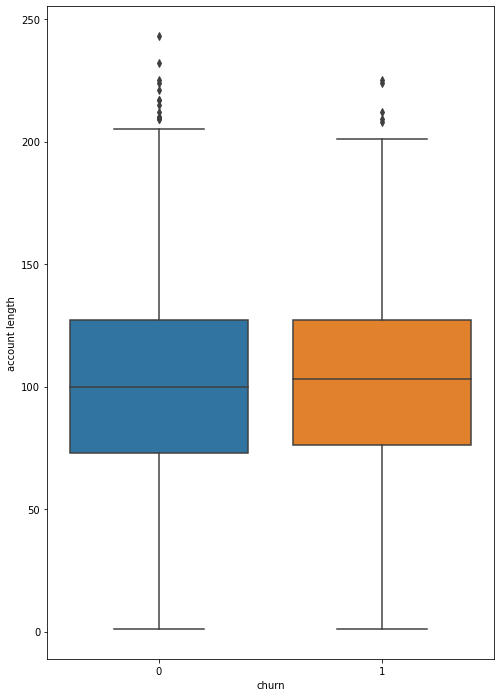

In [8]:
fig,ax = plt.subplots(figsize=(8,12))
sns.boxplot(data=s_tel,x='churn',y='account length');

In [9]:
al_not_churned = s_tel[s_tel['churn']==0]['account length']
al_churned = s_tel[s_tel['churn']==1]['account length']
stats.ttest_ind(al_not_churned, al_churned,equal_var=False)

Ttest_indResult(statistic=-0.9618893197561772, pvalue=0.33645751767927445)

In [10]:
print(s_tel.groupby('international plan')['churn'].agg(np.mean))
print(s_tel.groupby('international plan')['churn'].agg(np.std))

international plan
no     0.114950
yes    0.424149
Name: churn, dtype: float64
international plan
no     0.319015
yes    0.494980
Name: churn, dtype: float64


In [11]:
print(s_tel.groupby('voice mail plan')['churn'].agg(np.mean))
print(s_tel.groupby('voice mail plan')['churn'].agg(np.std))

voice mail plan
no     0.167151
yes    0.086768
Name: churn, dtype: float64
voice mail plan
no     0.373188
yes    0.281647
Name: churn, dtype: float64


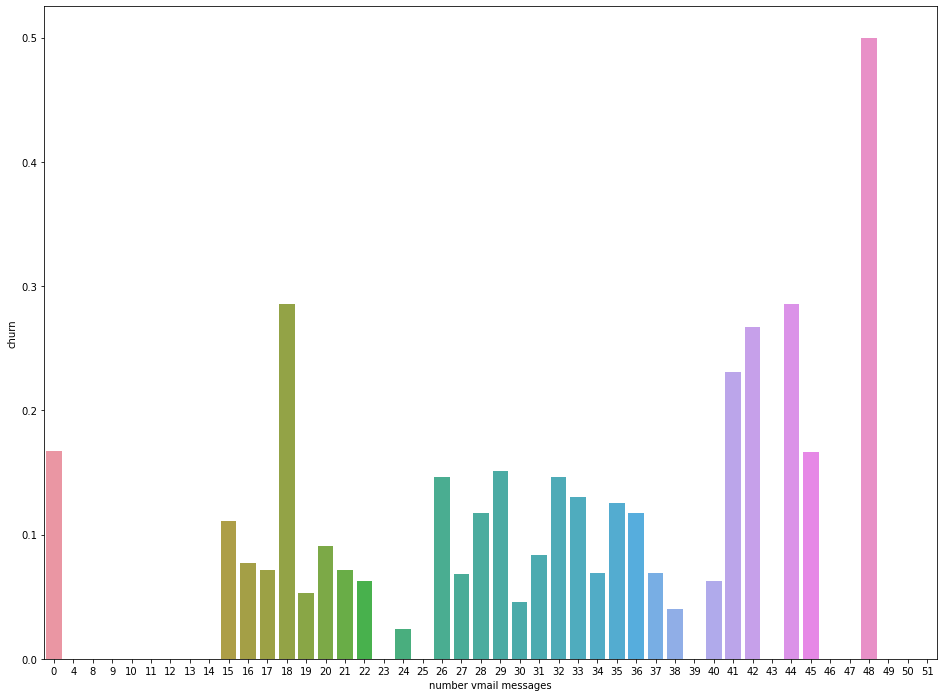

In [12]:
vmail = s_tel.groupby('number vmail messages')['churn'].agg(np.mean)
fig,ax = plt.subplots(figsize = (16,12))
sns.barplot(x=vmail.index,y=vmail,ax=ax);

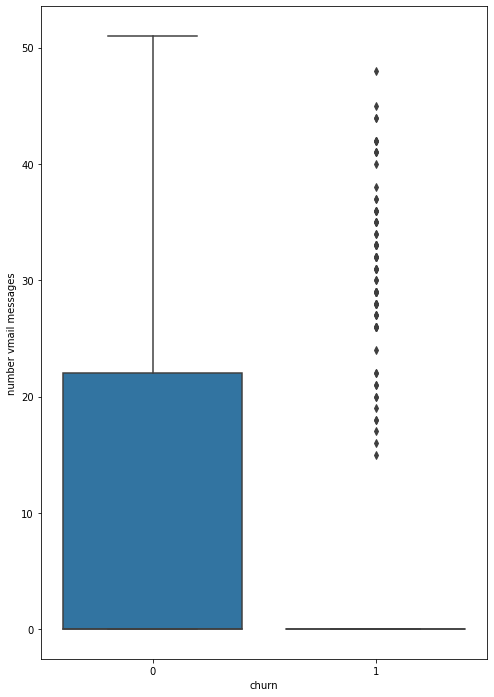

In [13]:
fig,ax = plt.subplots(figsize=(8,12))
sns.boxplot(data=s_tel,x='churn',y='number vmail messages');

In [14]:
vm_not_churned = s_tel[s_tel['churn']==0]['number vmail messages']
vm_churned = s_tel[s_tel['churn']==1]['number vmail messages']
stats.ttest_ind(vm_not_churned, vm_churned,equal_var=False)

Ttest_indResult(statistic=5.821253623286179, pvalue=8.76478218022036e-09)

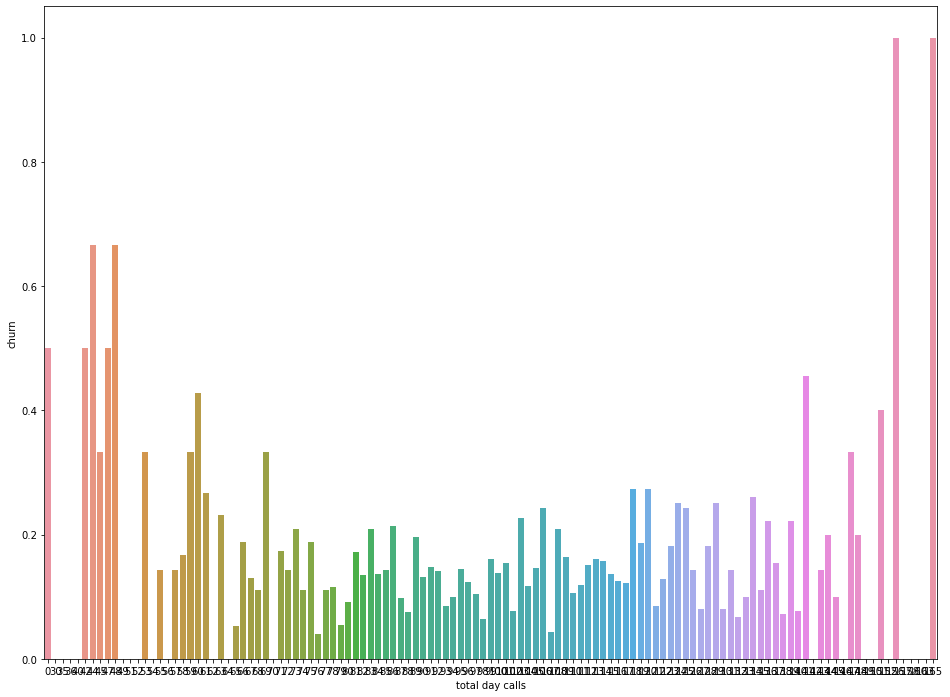

In [15]:
dc = s_tel.groupby('total day calls')['churn'].agg(np.mean)
fig,ax = plt.subplots(figsize = (16,12))
sns.barplot(x=dc.index,y=dc,ax=ax);

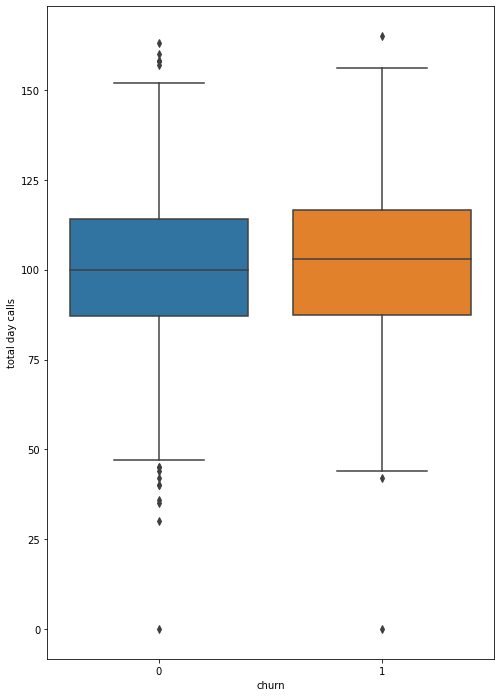

In [16]:
fig,ax = plt.subplots(figsize=(8,12))
sns.boxplot(data=s_tel,x='churn',y='total day calls');

In [17]:
dc_not_churned = s_tel[s_tel['churn']==0]['total day calls']
dc_churned = s_tel[s_tel['churn']==1]['total day calls']
stats.ttest_ind(dc_not_churned, dc_churned,equal_var=False)

Ttest_indResult(statistic=-1.0023867230811039, pvalue=0.316543431358623)

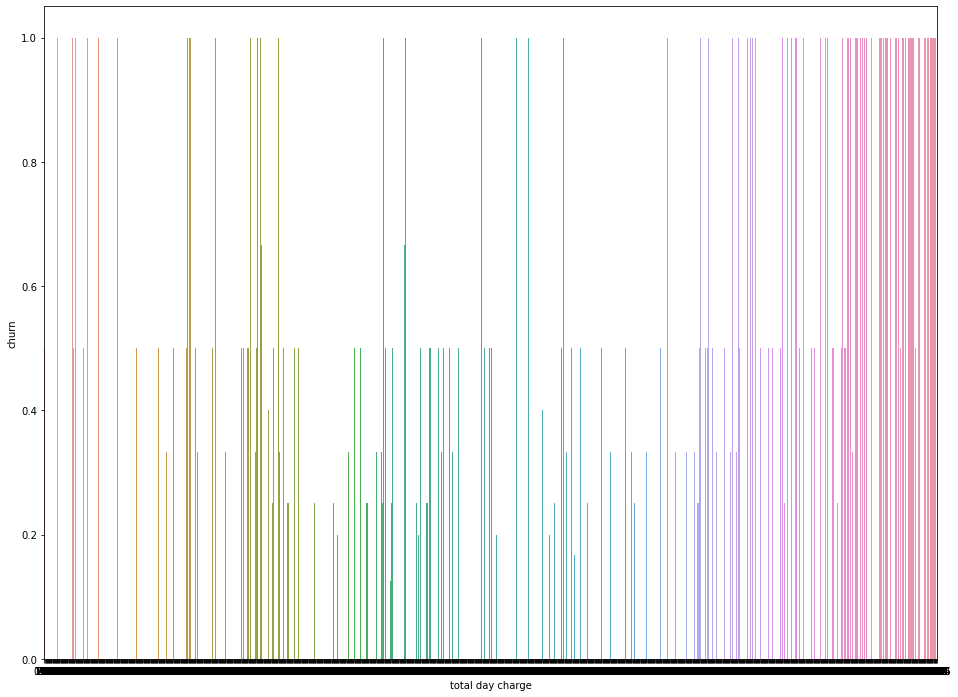

In [18]:
dchg = s_tel.groupby('total day charge')['churn'].agg(np.mean)
fig,ax = plt.subplots(figsize = (16,12))
sns.barplot(x=dchg.index,y=dchg,ax=ax);

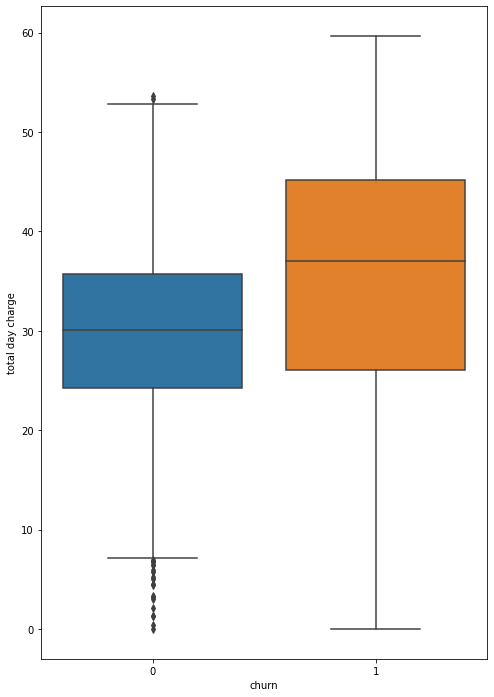

In [19]:
fig,ax = plt.subplots(figsize=(8,12))
sns.boxplot(data=s_tel,x='churn',y='total day charge');

In [20]:
dchg_not_churned = s_tel[s_tel['churn']==0]['total day charge']
dchg_churned = s_tel[s_tel['churn']==1]['total day charge']
stats.ttest_ind(dchg_not_churned, dchg_churned,equal_var=False)

Ttest_indResult(statistic=-9.684475930233658, pvalue=1.2198763860802676e-20)

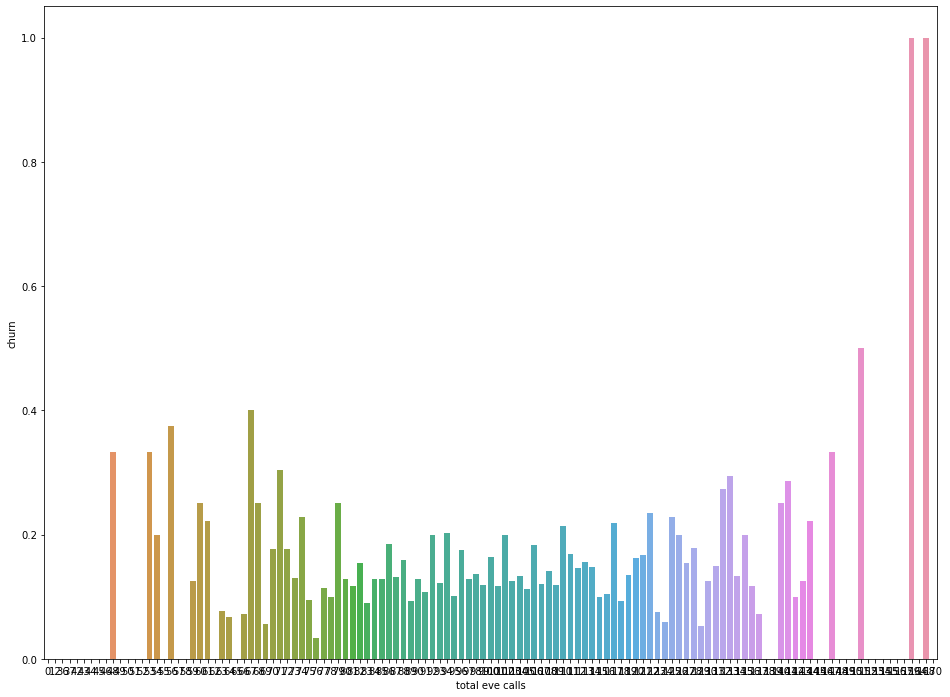

In [21]:
ec = s_tel.groupby('total eve calls')['churn'].agg(np.mean)
fig,ax = plt.subplots(figsize = (16,12))
sns.barplot(x=ec.index,y=ec,ax=ax);

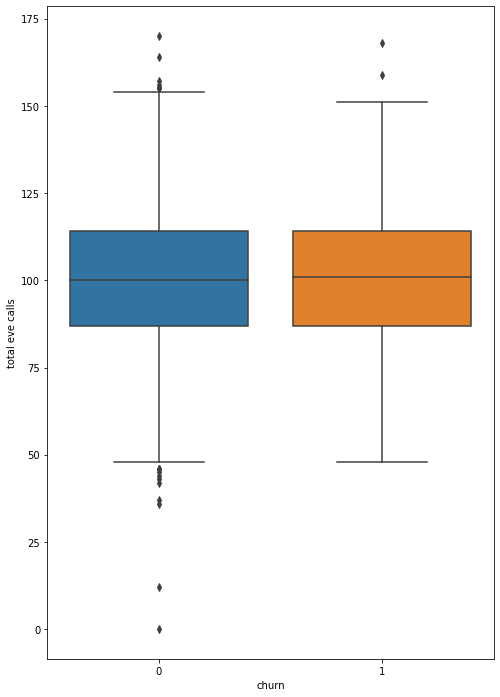

In [22]:
fig,ax = plt.subplots(figsize=(8,12))
sns.boxplot(data=s_tel,x='churn',y='total eve calls');

In [23]:
ec_not_churned = s_tel[s_tel['churn']==0]['total eve calls']
ec_churned = s_tel[s_tel['churn']==1]['total eve calls']
stats.ttest_ind(ec_not_churned, ec_churned,equal_var=False)

Ttest_indResult(statistic=-0.537388864584388, pvalue=0.5911800500990859)

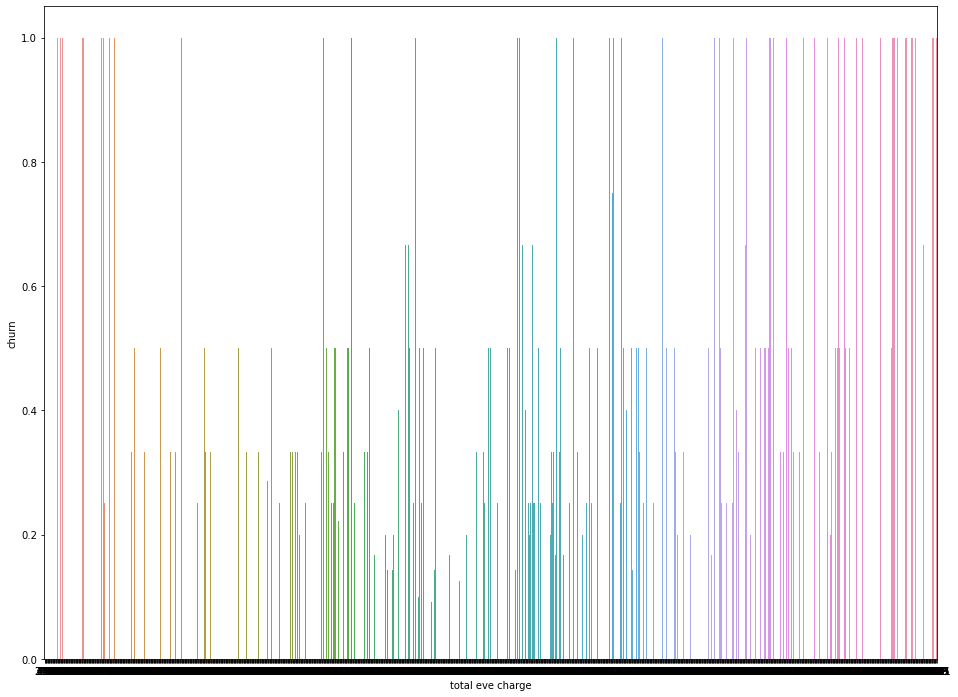

In [24]:
echg = s_tel.groupby('total eve charge')['churn'].agg(np.mean)
fig,ax = plt.subplots(figsize = (16,12))
sns.barplot(x=echg.index,y=echg,ax=ax);

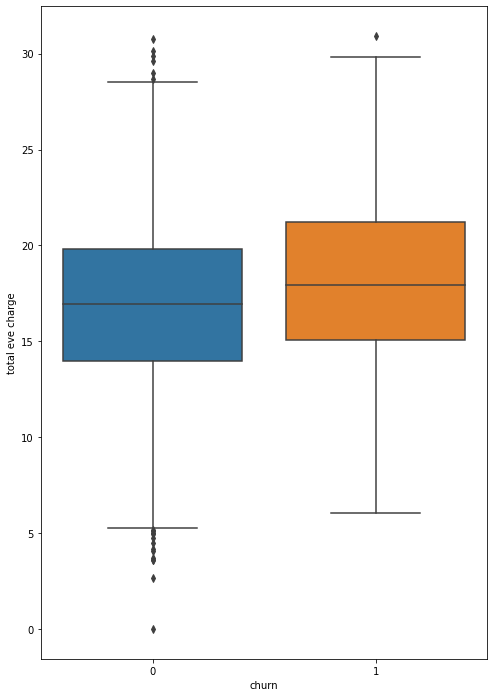

In [25]:
fig,ax = plt.subplots(figsize=(8,12))
sns.boxplot(data=s_tel,x='churn',y='total eve charge');

In [26]:
echg_not_churned = s_tel[s_tel['churn']==0]['total eve charge']
echg_churned = s_tel[s_tel['churn']==1]['total eve charge']
stats.ttest_ind(echg_not_churned, echg_churned,equal_var=False)

Ttest_indResult(statistic=-5.271985823981345, pvalue=1.8426075435722568e-07)

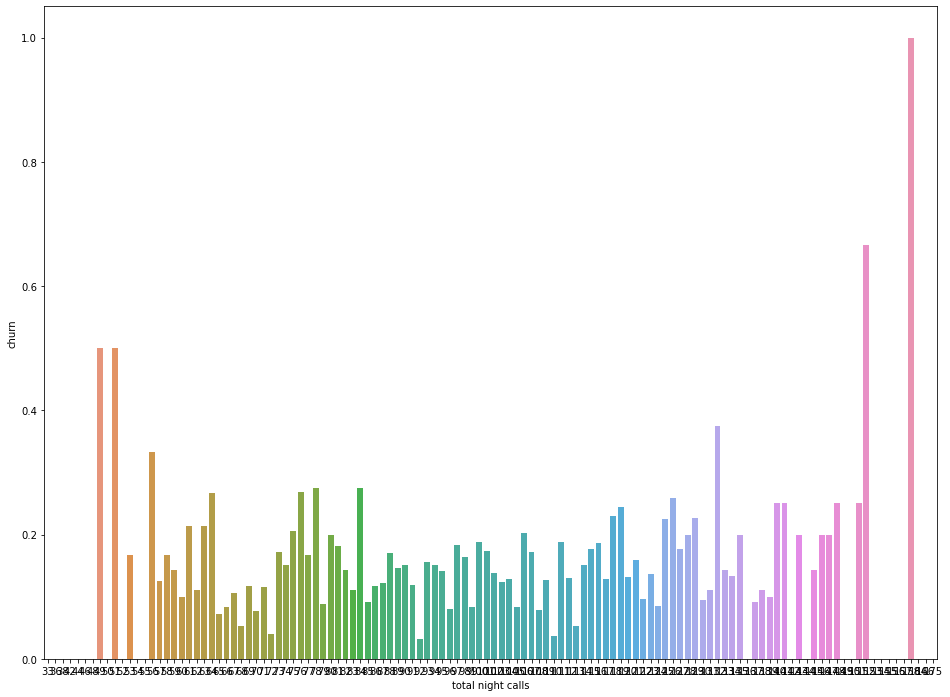

In [27]:
nc = s_tel.groupby('total night calls')['churn'].agg(np.mean)
fig,ax = plt.subplots(figsize = (16,12))
sns.barplot(x=nc.index,y=nc,ax=ax);

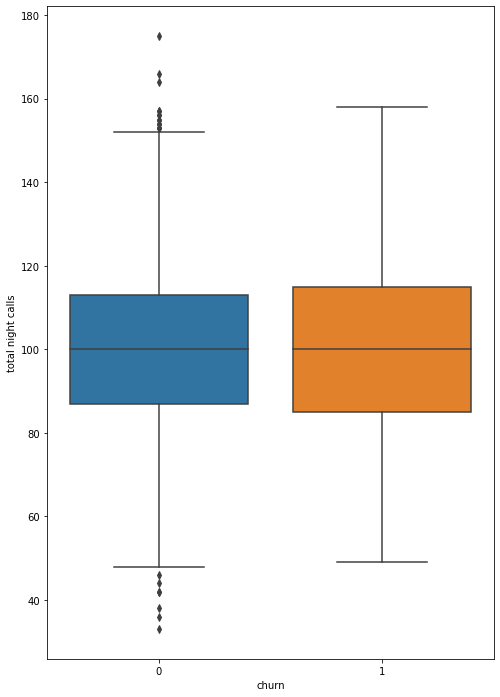

In [28]:
fig,ax = plt.subplots(figsize=(8,12))
sns.boxplot(data=s_tel,x='churn',y='total night calls');

In [29]:
nc_not_churned = s_tel[s_tel['churn']==0]['total night calls']
nc_churned = s_tel[s_tel['churn']==1]['total night calls']
stats.ttest_ind(nc_not_churned, nc_churned,equal_var=False)

Ttest_indResult(statistic=-0.34881843194709833, pvalue=0.7273389409976107)

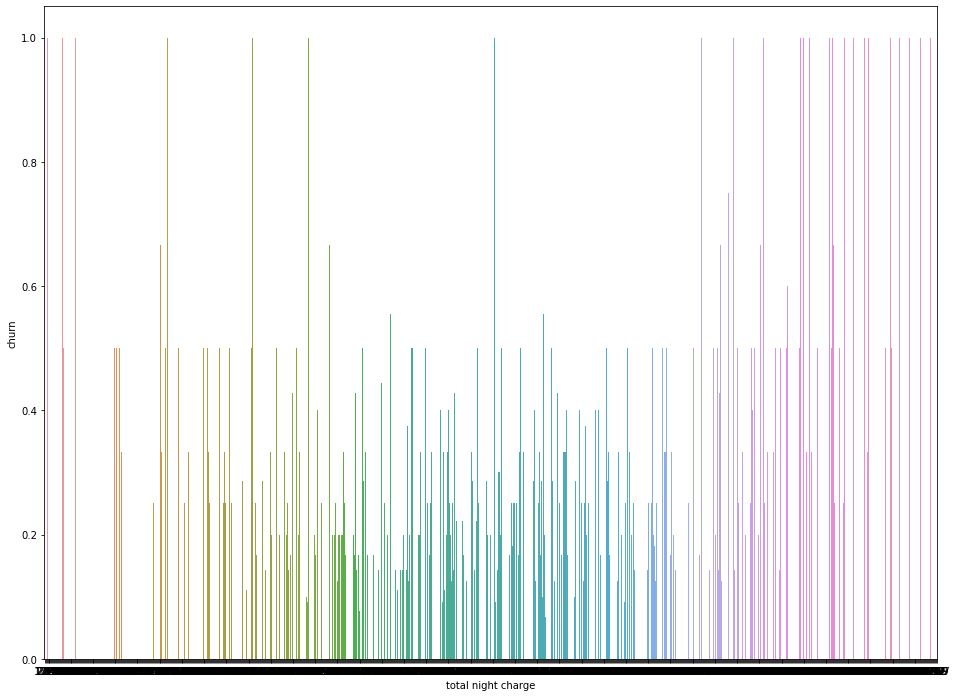

In [30]:
nchg = s_tel.groupby('total night charge')['churn'].agg(np.mean)
fig,ax = plt.subplots(figsize = (16,12))
sns.barplot(x=nchg.index,y=nchg,ax=ax);

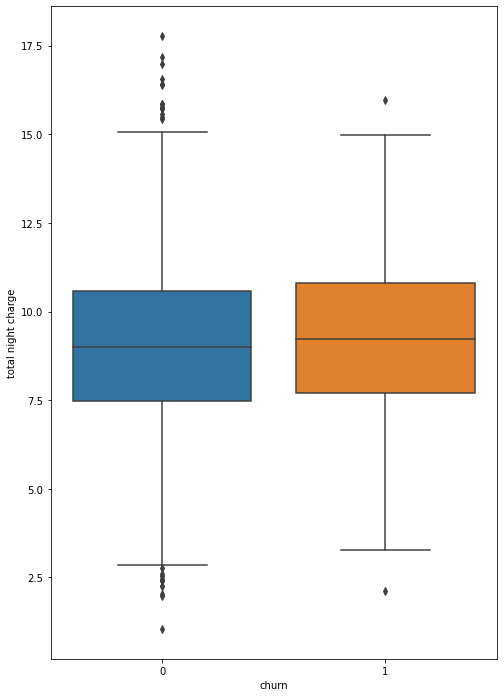

In [31]:
fig,ax = plt.subplots(figsize=(8,12))
sns.boxplot(data=s_tel,x='churn',y='total night charge');

In [32]:
nchg_not_churned = s_tel[s_tel['churn']==0]['total night charge']
nchg_churned = s_tel[s_tel['churn']==1]['total night charge']
stats.ttest_ind(nchg_not_churned, nchg_churned,equal_var=False)

Ttest_indResult(statistic=-2.171006887437526, pvalue=0.030271539217208626)

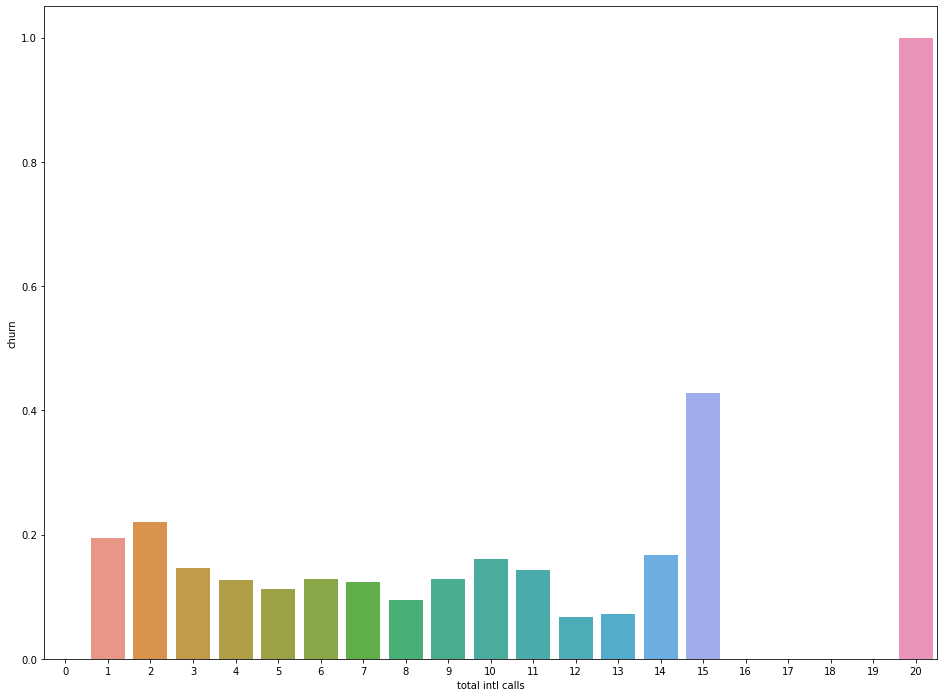

In [33]:
ic = s_tel.groupby('total intl calls')['churn'].agg(np.mean)
fig,ax = plt.subplots(figsize = (16,12))
sns.barplot(x=ic.index,y=ic,ax=ax);

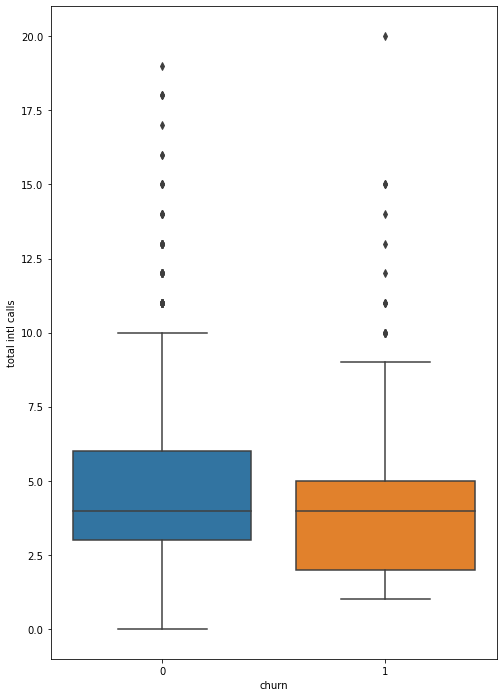

In [34]:
fig,ax = plt.subplots(figsize=(8,12))
sns.boxplot(data=s_tel,x='churn',y='total intl calls');

In [35]:
ic_not_churned = s_tel[s_tel['churn']==0]['total intl calls']
ic_churned = s_tel[s_tel['churn']==1]['total intl calls']
stats.ttest_ind(ic_not_churned, ic_churned,equal_var=False)

Ttest_indResult(statistic=2.9604196334383635, pvalue=0.003185776922903233)

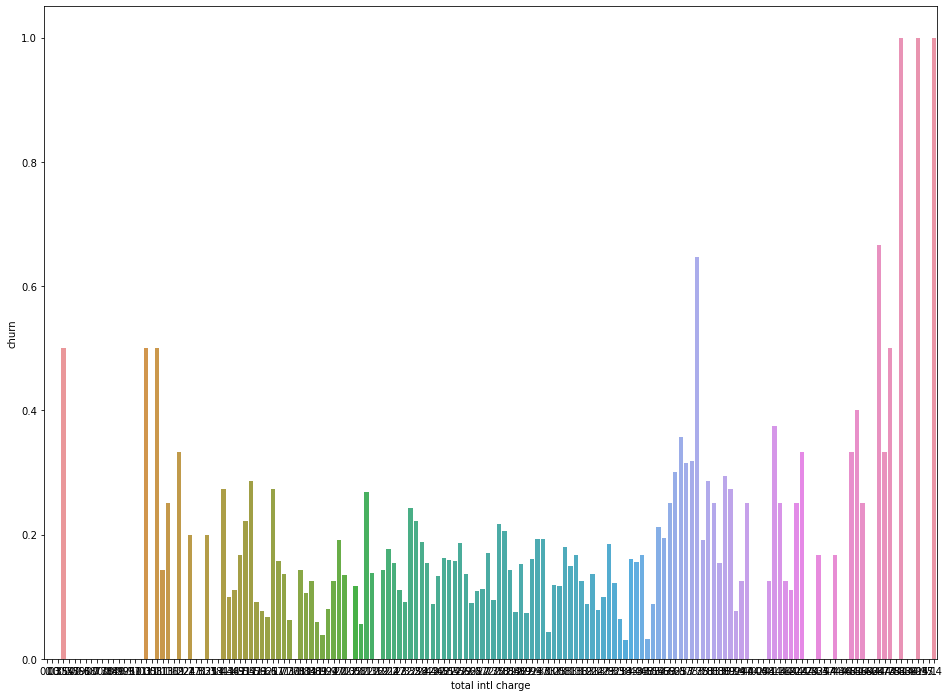

In [36]:
ichg = s_tel.groupby('total intl charge')['churn'].agg(np.mean)
fig,ax = plt.subplots(figsize = (16,12))
sns.barplot(x=ichg.index,y=ichg,ax=ax);

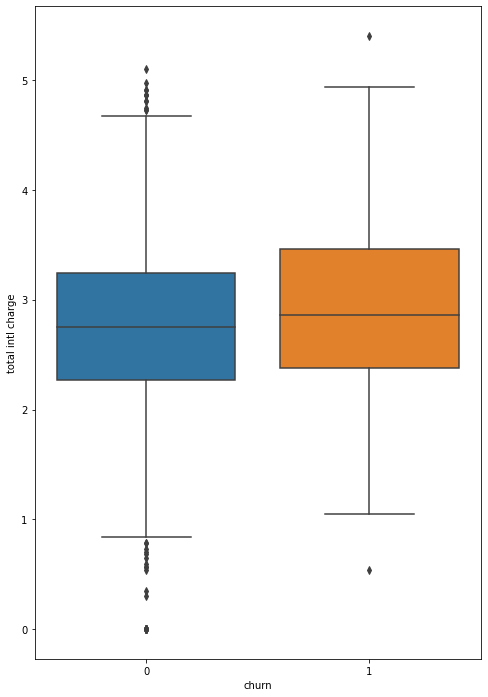

In [37]:
fig,ax = plt.subplots(figsize=(8,12))
sns.boxplot(data=s_tel,x='churn',y='total intl charge');

In [38]:
ichg_not_churned = s_tel[s_tel['churn']==0]['total intl charge']
ichg_churned = s_tel[s_tel['churn']==1]['total intl charge']
stats.ttest_ind(ichg_not_churned, ichg_churned,equal_var=False)

Ttest_indResult(statistic=-3.939933040077332, pvalue=9.025886559180106e-05)

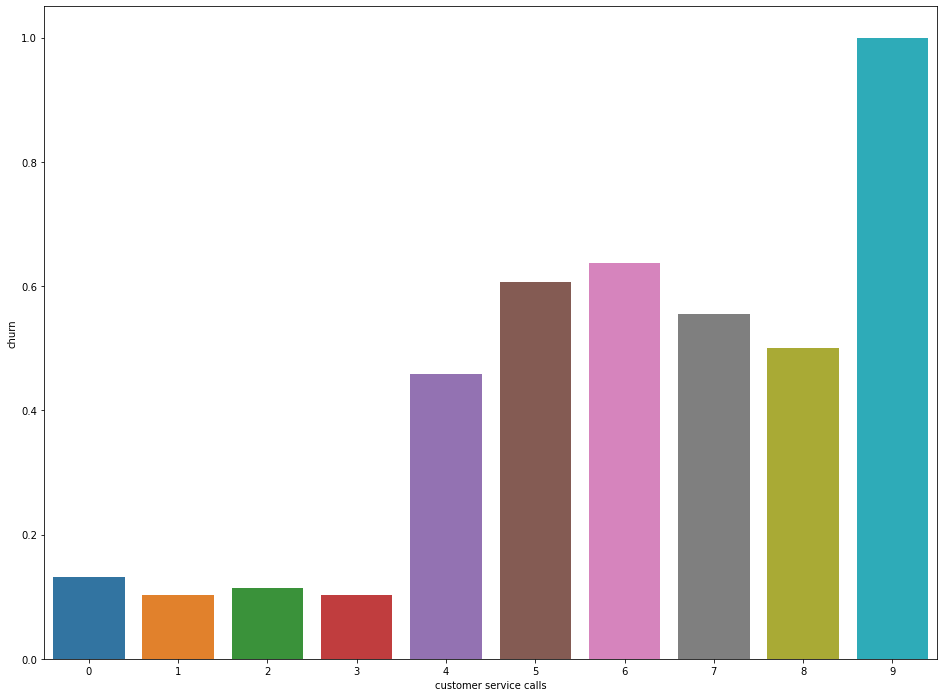

In [39]:
cs = s_tel.groupby('customer service calls')['churn'].agg(np.mean)
fig,ax = plt.subplots(figsize = (16,12))
sns.barplot(x=cs.index,y=cs,ax=ax);

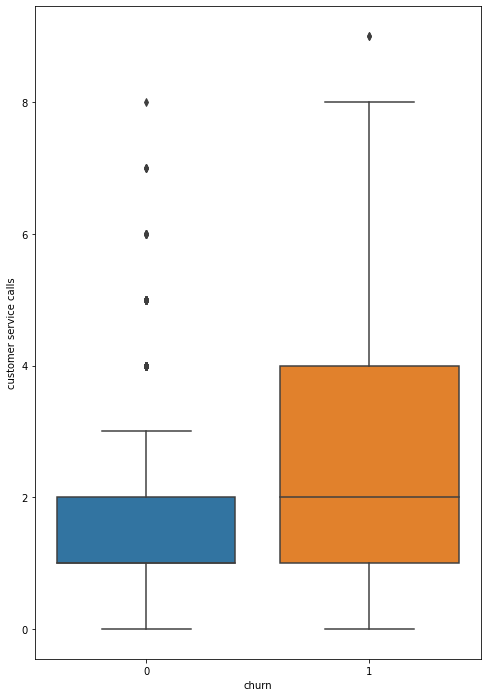

In [40]:
fig,ax = plt.subplots(figsize=(8,12))
sns.boxplot(data=s_tel,x='churn',y='customer service calls');

In [41]:
cs_not_churned = s_tel[s_tel['churn']==0]['customer service calls']
cs_churned = s_tel[s_tel['churn']==1]['customer service calls']
stats.ttest_ind(cs_not_churned, cs_churned,equal_var=False)

Ttest_indResult(statistic=-8.95514138244338, pvalue=5.270040385717215e-18)

In [42]:
s_tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   object 
 3   voice mail plan         3333 non-null   object 
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

<h1>Modeling

In [43]:
models = {}
scoring = {'Acc':'accuracy',
            'Prec':'precision',
            'Rec':'recall',
            'F1':'f1'}

class Finished_Model():

    def __init__(self, model, model_name,  X,y):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        self.cv_results = None
        
        self.cross_validate()
        self.train()            
    
    def __repr__(self):
        return(f'F1 Score: {self.f1_mean:.3f}, Recall Score: {self.rec_mean:.3f}')

    def train(self):
        self.model.fit(self.X,self.y)
        self.yhat = self.model.predict(self.X)

        self.train_acc = accuracy_score(self.y,self.yhat)
        self.train_prec = precision_score(self.y,self.yhat)
        self.train_rec = recall_score(self.y,self.yhat)
        self.train_f1 = f1_score(self.y,self.yhat)
        
    def cross_validate(self, folds=10):
        self.cv_results = cross_validate(self.model,X,y,cv=folds,scoring=scoring)

        self.acc_mean = np.mean(self.cv_results['test_Acc'])
        self.acc_std = np.std(self.cv_results['test_Acc'])

        self.prec_mean = np.mean(self.cv_results['test_Prec'])
        self.prec_std = np.std(self.cv_results['test_Prec'])

        self.rec_mean = np.mean(self.cv_results['test_Rec'])
        self.rec_std = np.std(self.cv_results['test_Rec'])

        self.f1_mean = np.mean(self.cv_results['test_F1'])
        self.f1_std = np.std(self.cv_results['test_F1'])
    
    def summary(self,verbose=False):

        train_title = f'Training Results for {self.name}:'
        train_acc = f'Training Accuracy: {self.train_acc:.3f}'
        train_prec = f'Training Precision: {self.train_prec:.3f}'
        train_rec = f'Training Recall: {self.train_rec:.3f}'
        train_f1 = f'Training F1: {self.train_f1:.3f}'

        breaker = ' == '
        cv_title = f'Cross Validation results for {self.name}:'
        cv_accuracy = f'CV Accuracy: Mean = {self.acc_mean:.3f} Std = {self.acc_std:.3f}'
        cv_precision = f'CV Precision: Mean = {self.prec_mean:.3f} Std = {self.prec_std:.3f}'
        cv_recall = f'CV Recall: Mean = {self.rec_mean:.3f} Std = {self.rec_std:.3f}'
        cv_f1 = f'CV F1: Mean = {self.f1_mean:.3f} Std = {self.f1_std:.3f}'

        for line in [train_title,train_acc,train_prec,train_rec,train_f1,
                    breaker,cv_title,cv_accuracy,cv_precision,cv_recall,cv_f1]:
            print(line)



In [44]:
X = s_tel.drop('churn',axis=1)
y = s_tel.churn

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [45]:
drop_columns = ['total day minutes','total eve minutes','total night minutes','total intl minutes',
                'account length','total day calls','total eve calls','total night calls']

categorical_cols = ['state']
ordinal_cols = ['international plan','voice mail plan']
numerical_cols = X.drop(categorical_cols+ordinal_cols+drop_columns,axis=1).columns

In [46]:
column_transformer = ColumnTransformer(transformers=[
    ('OHE',OneHotEncoder(categories='auto',handle_unknown='ignore',sparse=False),categorical_cols),
    ('ORD',OrdinalEncoder(categories='auto'),ordinal_cols),
    ('STD',StandardScaler(),numerical_cols)
    ],remainder='drop')

<h1>Using Class Weights


<h3>Logistic Regression Model

In [47]:
pipe_log_reg = Pipeline(steps=[
    ('ct',column_transformer),
    ('log_regression',LogisticRegression(random_state=42,class_weight='balanced'))
    ])

logistic_regression_model = Finished_Model(pipe_log_reg,'Basic Logistic Regression',X_train,y_train)
models[logistic_regression_model.name] = logistic_regression_model

logistic_regression_model.summary(verbose=True)

Training Results for Basic Logistic Regression:
Training Accuracy: 0.776
Training Precision: 0.365
Training Recall: 0.767
Training F1: 0.495
 == 
Cross Validation results for Basic Logistic Regression:
CV Accuracy: Mean = 0.766 Std = 0.026
CV Precision: Mean = 0.353 Std = 0.036
CV Recall: Mean = 0.737 Std = 0.079
CV F1: Mean = 0.477 Std = 0.048


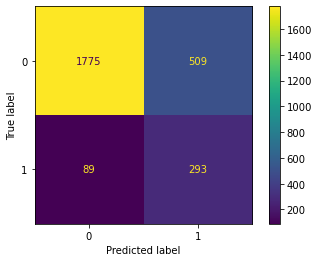

In [48]:
plot_confusion_matrix(pipe_log_reg,X_train,y_train)

<h3>Decision Tree Model

In [49]:
pipe_dec_tree = Pipeline(steps=[
    ('ct',column_transformer),
    ('decision tree',DecisionTreeClassifier(random_state=42,class_weight='balanced'))
    ])

decision_tree_model = Finished_Model(pipe_dec_tree,'Basic Decision Tree',X_train,y_train)
models[decision_tree_model.name] = decision_tree_model

decision_tree_model.summary(verbose=True)

Training Results for Basic Decision Tree:
Training Accuracy: 1.000
Training Precision: 1.000
Training Recall: 1.000
Training F1: 1.000
 == 
Cross Validation results for Basic Decision Tree:
CV Accuracy: Mean = 0.922 Std = 0.011
CV Precision: Mean = 0.719 Std = 0.039
CV Recall: Mean = 0.762 Std = 0.065
CV F1: Mean = 0.738 Std = 0.041


<h3>KNN Model

In [50]:
pipe_knn = Pipeline(steps=[
    ('ct',column_transformer),
    ('knn',KNeighborsClassifier(n_neighbors=3))
    ])

knn_model = Finished_Model(pipe_knn,'Basic KNN Model',X_train,y_train)
models[knn_model.name] = knn_model

knn_model.summary(verbose=True)

Training Results for Basic KNN Model:
Training Accuracy: 0.932
Training Precision: 0.928
Training Recall: 0.571
Training F1: 0.707
 == 
Cross Validation results for Basic KNN Model:
CV Accuracy: Mean = 0.898 Std = 0.015
CV Precision: Mean = 0.795 Std = 0.082
CV Recall: Mean = 0.398 Std = 0.081
CV F1: Mean = 0.527 Std = 0.083


<h3>Naive Bayes Model


In [51]:
pipe_bayes = Pipeline(steps=[
    ('ct',column_transformer),
    ('naive bayes',GaussianNB())
    ])

naive_bayes_model = Finished_Model(pipe_bayes,'Basic Naive Bayes',X_train,y_train)
models[naive_bayes_model.name] = naive_bayes_model

naive_bayes_model.summary(verbose=True)

Training Results for Basic Naive Bayes:
Training Accuracy: 0.608
Training Precision: 0.219
Training Recall: 0.678
Training F1: 0.332
 == 
Cross Validation results for Basic Naive Bayes:
CV Accuracy: Mean = 0.586 Std = 0.030
CV Precision: Mean = 0.197 Std = 0.024
CV Recall: Mean = 0.605 Std = 0.079
CV F1: Mean = 0.298 Std = 0.036


<h3>Random Forest Model

In [52]:
pipe_forest = Pipeline(steps=[
    ('ct',column_transformer),
    ('forest',RandomForestClassifier(random_state=42,class_weight='balanced'))
    ])

random_forest_model = Finished_Model(pipe_forest,'Basic Random Forest',X_train,y_train)
models[random_forest_model.name] = random_forest_model

random_forest_model.summary(verbose=True)

Training Results for Basic Random Forest:
Training Accuracy: 1.000
Training Precision: 1.000
Training Recall: 1.000
Training F1: 1.000
 == 
Cross Validation results for Basic Random Forest:
CV Accuracy: Mean = 0.942 Std = 0.013
CV Precision: Mean = 0.949 Std = 0.028
CV Recall: Mean = 0.633 Std = 0.082
CV F1: Mean = 0.757 Std = 0.066


<h3>Extra Trees Model

In [53]:
pipe_extra = Pipeline(steps=[
    ('ct',column_transformer),
    ('extra',ExtraTreesClassifier(random_state=42,class_weight='balanced'))
    ])

extra_trees_model = Finished_Model(pipe_extra,'Basic Extra Trees',X_train,y_train)
models[extra_trees_model.name] = extra_trees_model

extra_trees_model.summary(verbose=True)

Training Results for Basic Extra Trees:
Training Accuracy: 1.000
Training Precision: 1.000
Training Recall: 1.000
Training F1: 1.000
 == 
Cross Validation results for Basic Extra Trees:
CV Accuracy: Mean = 0.911 Std = 0.008
CV Precision: Mean = 0.890 Std = 0.046
CV Recall: Mean = 0.445 Std = 0.056
CV F1: Mean = 0.591 Std = 0.052


<h3>Boost Model

In [54]:
pipe_boost = Pipeline(steps=[
    ('ct',column_transformer),
    ('boost',AdaBoostClassifier(random_state=42))
    ])

boost_model = Finished_Model(pipe_boost,'Basic ADA Boost',X_train,y_train)
models[boost_model.name] = boost_model

boost_model.summary(verbose=True)

Training Results for Basic ADA Boost:
Training Accuracy: 0.897
Training Precision: 0.709
Training Recall: 0.479
Training F1: 0.572
 == 
Cross Validation results for Basic ADA Boost:
CV Accuracy: Mean = 0.880 Std = 0.011
CV Precision: Mean = 0.641 Std = 0.063
CV Recall: Mean = 0.389 Std = 0.056
CV F1: Mean = 0.483 Std = 0.054


In [55]:
models

{'Basic Logistic Regression': F1 Score: 0.477, Recall Score: 0.737,
 'Basic Decision Tree': F1 Score: 0.738, Recall Score: 0.762,
 'Basic KNN Model': F1 Score: 0.527, Recall Score: 0.398,
 'Basic Naive Bayes': F1 Score: 0.298, Recall Score: 0.605,
 'Basic Random Forest': F1 Score: 0.757, Recall Score: 0.633,
 'Basic Extra Trees': F1 Score: 0.591, Recall Score: 0.445,
 'Basic ADA Boost': F1 Score: 0.483, Recall Score: 0.389}

<h1>Using Smote

In [56]:
smote = SMOTE(random_state=42)

<h3>Logistic Regression

In [57]:
pipe_log_reg_smote = imbPipeline(steps=[
    ('ct',column_transformer),
    ('smote',smote),
    ('log_regression',LogisticRegression(random_state=42))
    ])

logistic_regression_model_smote = Finished_Model(pipe_log_reg_smote,'SMOTE Logistic Regression',X_train,y_train);
models[logistic_regression_model_smote.name] = logistic_regression_model_smote

logistic_regression_model_smote.summary(verbose=True)

Training Results for SMOTE Logistic Regression:
Training Accuracy: 0.774
Training Precision: 0.362
Training Recall: 0.759
Training F1: 0.491
 == 
Cross Validation results for SMOTE Logistic Regression:
CV Accuracy: Mean = 0.767 Std = 0.023
CV Precision: Mean = 0.353 Std = 0.033
CV Recall: Mean = 0.725 Std = 0.079
CV F1: Mean = 0.474 Std = 0.045


<h3>Decision Tree Model

In [58]:
pipe_dec_tree_smote = imbPipeline(steps=[
    ('ct',column_transformer),
    ('smote',smote),
    ('decision tree',DecisionTreeClassifier(random_state=42))
    ])

decision_tree_model_smote = Finished_Model(pipe_dec_tree_smote,'SMOTE Decision Tree',X_train,y_train)
models[decision_tree_model_smote.name] = decision_tree_model_smote

decision_tree_model_smote.summary(verbose=True)

Training Results for SMOTE Decision Tree:
Training Accuracy: 1.000
Training Precision: 1.000
Training Recall: 1.000
Training F1: 1.000
 == 
Cross Validation results for SMOTE Decision Tree:
CV Accuracy: Mean = 0.905 Std = 0.013
CV Precision: Mean = 0.657 Std = 0.057
CV Recall: Mean = 0.743 Std = 0.054
CV F1: Mean = 0.694 Std = 0.031


<h3>KNN Model

In [59]:
pipe_knn_smote = imbPipeline(steps=[
    ('ct',column_transformer),
    ('smote',smote),
    ('knn',KNeighborsClassifier(n_neighbors=3))
    ])

knn_model_smote = Finished_Model(pipe_knn_smote,'SMOTE KNN Model',X_train,y_train)
models[knn_model_smote.name] = knn_model_smote

knn_model_smote.summary(verbose=True)

Training Results for SMOTE KNN Model:
Training Accuracy: 0.904
Training Precision: 0.599
Training Recall: 0.992
Training F1: 0.747
 == 
Cross Validation results for SMOTE KNN Model:
CV Accuracy: Mean = 0.789 Std = 0.020
CV Precision: Mean = 0.380 Std = 0.029
CV Recall: Mean = 0.710 Std = 0.065
CV F1: Mean = 0.494 Std = 0.035


<h3>Naive Bayes Model

In [60]:
pipe_bayes_smote = imbPipeline(steps=[
    ('ct',column_transformer),
    ('smote',smote),
    ('naive bayes',GaussianNB())
    ])

naive_bayes_model_smote = Finished_Model(pipe_bayes_smote,'SMOTE Naive Bayes',X_train,y_train)
models[naive_bayes_model_smote.name] = naive_bayes_model_smote

naive_bayes_model_smote.summary(verbose=True)

Training Results for SMOTE Naive Bayes:
Training Accuracy: 0.621
Training Precision: 0.213
Training Recall: 0.610
Training F1: 0.316
 == 
Cross Validation results for SMOTE Naive Bayes:
CV Accuracy: Mean = 0.596 Std = 0.021
CV Precision: Mean = 0.192 Std = 0.016
CV Recall: Mean = 0.559 Std = 0.064
CV F1: Mean = 0.286 Std = 0.025


<h3>Random Forest Model

In [61]:
pipe_forest_smote = imbPipeline(steps=[
    ('ct',column_transformer),
    ('smote',smote),
    ('forest',RandomForestClassifier(random_state=42))
    ])

random_forest_model_smote = Finished_Model(pipe_forest_smote,'SMOTE Random Forest',X_train,y_train)
models[random_forest_model_smote.name] = random_forest_model_smote

random_forest_model_smote.summary(verbose=True)

Training Results for SMOTE Random Forest:
Training Accuracy: 1.000
Training Precision: 1.000
Training Recall: 1.000
Training F1: 1.000
 == 
Cross Validation results for SMOTE Random Forest:
CV Accuracy: Mean = 0.943 Std = 0.013
CV Precision: Mean = 0.827 Std = 0.047
CV Recall: Mean = 0.768 Std = 0.057
CV F1: Mean = 0.796 Std = 0.047


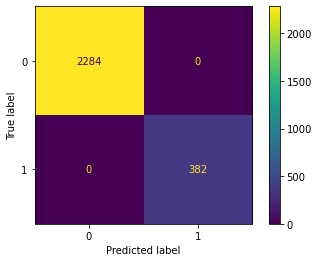

In [62]:
plot_confusion_matrix(pipe_forest_smote,X_train,y_train)

<h3>Extra Trees Model

In [63]:
pipe_extra_smote = imbPipeline(steps=[
    ('ct',column_transformer),
    ('smote',smote),
    ('extra',ExtraTreesClassifier(random_state=42))
    ])

extra_trees_model_smote = Finished_Model(pipe_extra_smote,'SMOTE Extra Trees',X_train,y_train)
models[extra_trees_model_smote.name] = extra_trees_model_smote

extra_trees_model_smote.summary(verbose=True)

Training Results for SMOTE Extra Trees:
Training Accuracy: 1.000
Training Precision: 1.000
Training Recall: 1.000
Training F1: 1.000
 == 
Cross Validation results for SMOTE Extra Trees:
CV Accuracy: Mean = 0.913 Std = 0.010
CV Precision: Mean = 0.792 Std = 0.057
CV Recall: Mean = 0.542 Std = 0.058
CV F1: Mean = 0.642 Std = 0.050


<h3>Boost Model

In [64]:
pipe_boost_smote = imbPipeline(steps=[
    ('ct',column_transformer),
    ('smote',smote),
    ('boost',AdaBoostClassifier(random_state=42))
    ])

boost_model_smote = Finished_Model(pipe_boost_smote,'SMOTE ADA Boost',X_train,y_train)
models[boost_model_smote.name] = boost_model_smote

boost_model_smote.summary(verbose=True)

Training Results for SMOTE ADA Boost:
Training Accuracy: 0.859
Training Precision: 0.506
Training Recall: 0.699
Training F1: 0.587
 == 
Cross Validation results for SMOTE ADA Boost:
CV Accuracy: Mean = 0.851 Std = 0.025
CV Precision: Mean = 0.493 Std = 0.070
CV Recall: Mean = 0.656 Std = 0.080
CV F1: Mean = 0.562 Std = 0.070


In [65]:
models

{'Basic Logistic Regression': F1 Score: 0.477, Recall Score: 0.737,
 'Basic Decision Tree': F1 Score: 0.738, Recall Score: 0.762,
 'Basic KNN Model': F1 Score: 0.527, Recall Score: 0.398,
 'Basic Naive Bayes': F1 Score: 0.298, Recall Score: 0.605,
 'Basic Random Forest': F1 Score: 0.757, Recall Score: 0.633,
 'Basic Extra Trees': F1 Score: 0.591, Recall Score: 0.445,
 'Basic ADA Boost': F1 Score: 0.483, Recall Score: 0.389,
 'SMOTE Logistic Regression': F1 Score: 0.474, Recall Score: 0.725,
 'SMOTE Decision Tree': F1 Score: 0.694, Recall Score: 0.743,
 'SMOTE KNN Model': F1 Score: 0.494, Recall Score: 0.710,
 'SMOTE Naive Bayes': F1 Score: 0.286, Recall Score: 0.559,
 'SMOTE Random Forest': F1 Score: 0.796, Recall Score: 0.768,
 'SMOTE Extra Trees': F1 Score: 0.642, Recall Score: 0.542,
 'SMOTE ADA Boost': F1 Score: 0.562, Recall Score: 0.656}

<h1>More Feature Selection

In [66]:
random_forest_model_smote.summary(verbose=True)

Training Results for SMOTE Random Forest:
Training Accuracy: 1.000
Training Precision: 1.000
Training Recall: 1.000
Training F1: 1.000
 == 
Cross Validation results for SMOTE Random Forest:
CV Accuracy: Mean = 0.943 Std = 0.013
CV Precision: Mean = 0.827 Std = 0.047
CV Recall: Mean = 0.768 Std = 0.057
CV F1: Mean = 0.796 Std = 0.047


In [67]:
drop_columns = ['total day minutes','total eve minutes','total night minutes','total intl minutes',
                'account length','total day calls','total eve calls','total night calls','state']

ordinal_cols = ['international plan','voice mail plan']
numerical_cols = X.drop(categorical_cols+ordinal_cols+drop_columns,axis=1).columns

In [68]:
column_transformer_2 = ColumnTransformer(transformers=[
    ('ORD',OrdinalEncoder(categories='auto'),ordinal_cols),
    ('STD',StandardScaler(),numerical_cols)
    ],remainder='drop')

In [69]:
fs_forest = imbPipeline(steps=[
    ('ct',column_transformer_2),
    ('smote',smote),
    ('forest',RandomForestClassifier(random_state=42))
    ])
    
fs_forest_model = Finished_Model(fs_forest,'FS Random Forest',X_train,y_train)
models[fs_forest_model.name] = fs_forest_model

fs_forest_model.summary(verbose=True)

Training Results for FS Random Forest:
Training Accuracy: 1.000
Training Precision: 1.000
Training Recall: 1.000
Training F1: 1.000
 == 
Cross Validation results for FS Random Forest:
CV Accuracy: Mean = 0.950 Std = 0.012
CV Precision: Mean = 0.837 Std = 0.040
CV Recall: Mean = 0.818 Std = 0.055
CV F1: Mean = 0.827 Std = 0.042


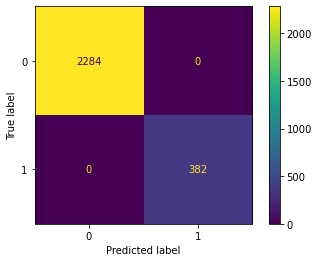

In [70]:
plot_confusion_matrix(fs_forest,X_train,y_train)

<h1>Grid Search

In [71]:
gs_forest = imbPipeline(steps=[
    ('ct',column_transformer_2),
    ('smote',smote),
    ('forest',RandomForestClassifier(random_state=42))
    ])

param_grid = {
    'forest__max_depth':[3,8,10,15,None],
    'forest__n_estimators':[10,50,100,200],
    'forest__min_samples_split':[2,4,8,16,32],
    'forest__min_samples_leaf':[1,2,4,8,16],
    'forest__max_features':[2,4,6,8,10],
}

f1_scorer = make_scorer(f1_score)

grid_forest_f1 = GridSearchCV(estimator=gs_forest,scoring=f1_scorer,n_jobs=threads,cv=5,
                            param_grid=param_grid)
grid_forest_f1.fit(X_train,y_train);

In [72]:
grid_forest_f1.best_estimator_

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('ORD', OrdinalEncoder(),
                                                  ['international plan',
                                                   'voice mail plan']),
                                                 ('STD', StandardScaler(),
                                                  Index(['number vmail messages', 'total day charge', 'total eve charge',
       'total night charge', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('forest',
                 RandomForestClassifier(max_features=4, n_estimators=50,
                                        random_state=42))])

In [73]:
grid_forest_model_f1 = Finished_Model(grid_forest_f1.best_estimator_,'Grid Forest F1',X_train,y_train)
models[grid_forest_model_f1.name] = grid_forest_model_f1
grid_forest_model_f1.summary(verbose=True)

Training Results for Grid Forest F1:
Training Accuracy: 1.000
Training Precision: 1.000
Training Recall: 0.997
Training F1: 0.999
 == 
Cross Validation results for Grid Forest F1:
CV Accuracy: Mean = 0.951 Std = 0.011
CV Precision: Mean = 0.843 Std = 0.039
CV Recall: Mean = 0.818 Std = 0.056
CV F1: Mean = 0.829 Std = 0.040


In [74]:
rec_scorer = make_scorer(recall_score)

grid_forest_rec = GridSearchCV(estimator=gs_forest,scoring=rec_scorer,n_jobs=threads,cv=5,
                            param_grid=param_grid)
grid_forest_rec.fit(X_train,y_train);

In [75]:
grid_forest_rec.best_estimator_

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('ORD', OrdinalEncoder(),
                                                  ['international plan',
                                                   'voice mail plan']),
                                                 ('STD', StandardScaler(),
                                                  Index(['number vmail messages', 'total day charge', 'total eve charge',
       'total night charge', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('forest',
                 RandomForestClassifier(max_depth=8, max_features=4,
                                        min_samples_leaf=16, n_estimators=10,
                                        random_state=42))])

In [76]:
grid_forest_model_rec = Finished_Model(grid_forest_rec.best_estimator_,'Grid Forest Rec',X_train,y_train)
models[grid_forest_model_rec.name] = grid_forest_model_rec
grid_forest_model_rec.summary(verbose=True)

Training Results for Grid Forest Rec:
Training Accuracy: 0.931
Training Precision: 0.718
Training Recall: 0.853
Training F1: 0.780
 == 
Cross Validation results for Grid Forest Rec:
CV Accuracy: Mean = 0.930 Std = 0.017
CV Precision: Mean = 0.732 Std = 0.062
CV Recall: Mean = 0.828 Std = 0.046
CV F1: Mean = 0.776 Std = 0.050


In [77]:
models

{'Basic Logistic Regression': F1 Score: 0.477, Recall Score: 0.737,
 'Basic Decision Tree': F1 Score: 0.738, Recall Score: 0.762,
 'Basic KNN Model': F1 Score: 0.527, Recall Score: 0.398,
 'Basic Naive Bayes': F1 Score: 0.298, Recall Score: 0.605,
 'Basic Random Forest': F1 Score: 0.757, Recall Score: 0.633,
 'Basic Extra Trees': F1 Score: 0.591, Recall Score: 0.445,
 'Basic ADA Boost': F1 Score: 0.483, Recall Score: 0.389,
 'SMOTE Logistic Regression': F1 Score: 0.474, Recall Score: 0.725,
 'SMOTE Decision Tree': F1 Score: 0.694, Recall Score: 0.743,
 'SMOTE KNN Model': F1 Score: 0.494, Recall Score: 0.710,
 'SMOTE Naive Bayes': F1 Score: 0.286, Recall Score: 0.559,
 'SMOTE Random Forest': F1 Score: 0.796, Recall Score: 0.768,
 'SMOTE Extra Trees': F1 Score: 0.642, Recall Score: 0.542,
 'SMOTE ADA Boost': F1 Score: 0.562, Recall Score: 0.656,
 'FS Random Forest': F1 Score: 0.827, Recall Score: 0.818,
 'Grid Forest F1': F1 Score: 0.829, Recall Score: 0.818,
 'Grid Forest Rec': F1 Score

<h1>Still overfitting

In [78]:
fi = grid_forest_model_f1.model.named_steps['forest'].feature_importances_
cols = X.drop(drop_columns,axis=1).columns
dict(zip(cols,np.round(fi,3)))

{'international plan': 0.146,
 'voice mail plan': 0.027,
 'number vmail messages': 0.025,
 'total day charge': 0.258,
 'total eve charge': 0.108,
 'total night charge': 0.066,
 'total intl calls': 0.092,
 'total intl charge': 0.077,
 'customer service calls': 0.2}

In [79]:
drop_columns = ['total day minutes','total eve minutes','total night minutes','total intl minutes',
                'account length','total day calls','total eve calls','total night calls','state']
extra_drop = ['voice mail plan', 'number vmail messages']

ordinal_cols = ['international plan']
numerical_cols = X.drop((categorical_cols+ordinal_cols+drop_columns+extra_drop),axis=1).columns

In [80]:
column_transformer_3 = ColumnTransformer(transformers=[
    ('ORD',OrdinalEncoder(categories='auto'),ordinal_cols),
    ('STD',StandardScaler(),numerical_cols)
    ],remainder='drop')

gs_forest_3 = imbPipeline(steps=[
    ('ct',column_transformer_3),
    ('smote',smote),
    ('forest',RandomForestClassifier(random_state=42))
    ])

In [81]:
grid_forest_3 = GridSearchCV(estimator=gs_forest_3,scoring=rec_scorer,n_jobs=threads,cv=5,
                            param_grid=param_grid)
grid_forest_3.fit(X_train,y_train);

In [82]:
grid_forest_3.best_estimator_

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('ORD', OrdinalEncoder(),
                                                  ['international plan']),
                                                 ('STD', StandardScaler(),
                                                  Index(['total day charge', 'total eve charge', 'total night charge',
       'total intl calls', 'total intl charge', 'customer service calls'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('forest',
                 RandomForestClassifier(max_depth=10, max_features=6,
                                        min_samples_leaf=2,
                                        min_samples_split=32,
                                        random_state=42))])

In [83]:
grid_forest_model_3 = Finished_Model(grid_forest_3.best_estimator_,'Grid Forest 3',X_train,y_train)
models[grid_forest_model_3.name] = grid_forest_model_3
grid_forest_model_3.summary(verbose=True)

Training Results for Grid Forest 3:
Training Accuracy: 0.947
Training Precision: 0.787
Training Recall: 0.861
Training F1: 0.823
 == 
Cross Validation results for Grid Forest 3:
CV Accuracy: Mean = 0.926 Std = 0.014
CV Precision: Mean = 0.708 Std = 0.040
CV Recall: Mean = 0.830 Std = 0.064
CV F1: Mean = 0.763 Std = 0.045


In [84]:
fi = grid_forest_model_3.model.named_steps['forest'].feature_importances_
cols = X.drop(drop_columns+extra_drop,axis=1).columns
dict(zip(cols,np.round(fi,3)))

{'international plan': 0.216,
 'total day charge': 0.307,
 'total eve charge': 0.099,
 'total night charge': 0.042,
 'total intl calls': 0.062,
 'total intl charge': 0.07,
 'customer service calls': 0.205}

In [85]:
models

{'Basic Logistic Regression': F1 Score: 0.477, Recall Score: 0.737,
 'Basic Decision Tree': F1 Score: 0.738, Recall Score: 0.762,
 'Basic KNN Model': F1 Score: 0.527, Recall Score: 0.398,
 'Basic Naive Bayes': F1 Score: 0.298, Recall Score: 0.605,
 'Basic Random Forest': F1 Score: 0.757, Recall Score: 0.633,
 'Basic Extra Trees': F1 Score: 0.591, Recall Score: 0.445,
 'Basic ADA Boost': F1 Score: 0.483, Recall Score: 0.389,
 'SMOTE Logistic Regression': F1 Score: 0.474, Recall Score: 0.725,
 'SMOTE Decision Tree': F1 Score: 0.694, Recall Score: 0.743,
 'SMOTE KNN Model': F1 Score: 0.494, Recall Score: 0.710,
 'SMOTE Naive Bayes': F1 Score: 0.286, Recall Score: 0.559,
 'SMOTE Random Forest': F1 Score: 0.796, Recall Score: 0.768,
 'SMOTE Extra Trees': F1 Score: 0.642, Recall Score: 0.542,
 'SMOTE ADA Boost': F1 Score: 0.562, Recall Score: 0.656,
 'FS Random Forest': F1 Score: 0.827, Recall Score: 0.818,
 'Grid Forest F1': F1 Score: 0.829, Recall Score: 0.818,
 'Grid Forest Rec': F1 Score

<h1> STILL Overfitting

In [86]:
gs_forest_nsm = Pipeline(steps=[
    ('ct',column_transformer_2),
    ('forest',RandomForestClassifier(random_state=42))
    ])

In [87]:
drop_columns = ['total day minutes','total eve minutes','total night minutes','total intl minutes',
                'account length','total day calls','total eve calls','total night calls','state']

ordinal_cols = ['international plan','voice mail plan']
numerical_cols = X.drop(categorical_cols+ordinal_cols+drop_columns,axis=1).columns

In [88]:
grid_forest_nsm = GridSearchCV(estimator=gs_forest_nsm,scoring=f1_scorer,n_jobs=threads,cv=5,
                            param_grid=param_grid)
grid_forest_nsm.fit(X_train,y_train);

In [89]:
grid_forest_nsm.best_estimator_

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('ORD', OrdinalEncoder(),
                                                  ['international plan',
                                                   'voice mail plan']),
                                                 ('STD', StandardScaler(),
                                                  Index(['number vmail messages', 'total day charge', 'total eve charge',
       'total night charge', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object'))])),
                ('forest',
                 RandomForestClassifier(max_features=6, min_samples_leaf=2,
                                        random_state=42))])

In [90]:
grid_forest_model_nsm = Finished_Model(grid_forest_nsm.best_estimator_,'Grid Forest No SM',X_train,y_train)
models[grid_forest_model_nsm.name] = grid_forest_model_nsm
grid_forest_model_nsm.summary(verbose=True)

Training Results for Grid Forest No SM:
Training Accuracy: 0.978
Training Precision: 0.997
Training Recall: 0.848
Training F1: 0.917
 == 
Cross Validation results for Grid Forest No SM:
CV Accuracy: Mean = 0.958 Std = 0.011
CV Precision: Mean = 0.930 Std = 0.030
CV Recall: Mean = 0.766 Std = 0.068
CV F1: Mean = 0.839 Std = 0.046


In [91]:
models

{'Basic Logistic Regression': F1 Score: 0.477, Recall Score: 0.737,
 'Basic Decision Tree': F1 Score: 0.738, Recall Score: 0.762,
 'Basic KNN Model': F1 Score: 0.527, Recall Score: 0.398,
 'Basic Naive Bayes': F1 Score: 0.298, Recall Score: 0.605,
 'Basic Random Forest': F1 Score: 0.757, Recall Score: 0.633,
 'Basic Extra Trees': F1 Score: 0.591, Recall Score: 0.445,
 'Basic ADA Boost': F1 Score: 0.483, Recall Score: 0.389,
 'SMOTE Logistic Regression': F1 Score: 0.474, Recall Score: 0.725,
 'SMOTE Decision Tree': F1 Score: 0.694, Recall Score: 0.743,
 'SMOTE KNN Model': F1 Score: 0.494, Recall Score: 0.710,
 'SMOTE Naive Bayes': F1 Score: 0.286, Recall Score: 0.559,
 'SMOTE Random Forest': F1 Score: 0.796, Recall Score: 0.768,
 'SMOTE Extra Trees': F1 Score: 0.642, Recall Score: 0.542,
 'SMOTE ADA Boost': F1 Score: 0.562, Recall Score: 0.656,
 'FS Random Forest': F1 Score: 0.827, Recall Score: 0.818,
 'Grid Forest F1': F1 Score: 0.829, Recall Score: 0.818,
 'Grid Forest Rec': F1 Score

In [92]:
grid_forest_nsm_rec = GridSearchCV(estimator=gs_forest_nsm,scoring=rec_scorer,n_jobs=threads,cv=5,
                            param_grid=param_grid)
grid_forest_nsm_rec.fit(X_train,y_train);

In [93]:
grid_forest_nsm_rec.best_estimator_

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('ORD', OrdinalEncoder(),
                                                  ['international plan',
                                                   'voice mail plan']),
                                                 ('STD', StandardScaler(),
                                                  Index(['number vmail messages', 'total day charge', 'total eve charge',
       'total night charge', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object'))])),
                ('forest',
                 RandomForestClassifier(max_depth=15, max_features=8,
                                        min_samples_split=4,
                                        random_state=42))])

In [94]:
grid_forest_model_nsm_rec = Finished_Model(grid_forest_nsm_rec.best_estimator_,'Grid Forest No SM Rec',X_train,y_train)
models[grid_forest_model_nsm_rec.name] = grid_forest_model_nsm_rec
grid_forest_model_nsm_rec.summary(verbose=True)

Training Results for Grid Forest No SM Rec:
Training Accuracy: 0.985
Training Precision: 0.997
Training Recall: 0.895
Training F1: 0.943
 == 
Cross Validation results for Grid Forest No SM Rec:
CV Accuracy: Mean = 0.956 Std = 0.011
CV Precision: Mean = 0.921 Std = 0.034
CV Recall: Mean = 0.760 Std = 0.070
CV F1: Mean = 0.831 Std = 0.045


In [95]:
models

{'Basic Logistic Regression': F1 Score: 0.477, Recall Score: 0.737,
 'Basic Decision Tree': F1 Score: 0.738, Recall Score: 0.762,
 'Basic KNN Model': F1 Score: 0.527, Recall Score: 0.398,
 'Basic Naive Bayes': F1 Score: 0.298, Recall Score: 0.605,
 'Basic Random Forest': F1 Score: 0.757, Recall Score: 0.633,
 'Basic Extra Trees': F1 Score: 0.591, Recall Score: 0.445,
 'Basic ADA Boost': F1 Score: 0.483, Recall Score: 0.389,
 'SMOTE Logistic Regression': F1 Score: 0.474, Recall Score: 0.725,
 'SMOTE Decision Tree': F1 Score: 0.694, Recall Score: 0.743,
 'SMOTE KNN Model': F1 Score: 0.494, Recall Score: 0.710,
 'SMOTE Naive Bayes': F1 Score: 0.286, Recall Score: 0.559,
 'SMOTE Random Forest': F1 Score: 0.796, Recall Score: 0.768,
 'SMOTE Extra Trees': F1 Score: 0.642, Recall Score: 0.542,
 'SMOTE ADA Boost': F1 Score: 0.562, Recall Score: 0.656,
 'FS Random Forest': F1 Score: 0.827, Recall Score: 0.818,
 'Grid Forest F1': F1 Score: 0.829, Recall Score: 0.818,
 'Grid Forest Rec': F1 Score

In [111]:
recs = [x.rec_mean for x in models.values()]
f1s = [x.f1_mean for x in models.values()]

Text(0, 0.5, 'Recall Score')

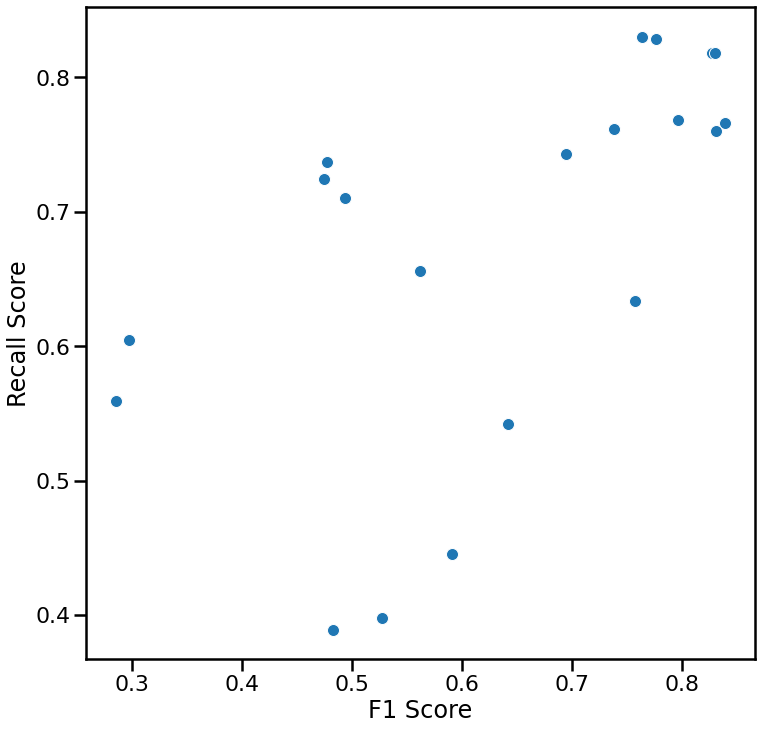

In [112]:
fig,ax = plt.subplots(figsize=(12,12))
sns.set_context('poster')
sns.scatterplot(y=recs,x=f1s,ax=ax)
ax.set_xlabel('F1 Score')
ax.set_ylabel('Recall Score')

In [113]:
etc = Pipeline(steps=[
    ('ct',column_transformer_2),
    ('forest',ExtraTreesClassifier(random_state=42))
    ])

In [115]:
etc_gs = GridSearchCV(estimator=etc,scoring=f1_scorer,n_jobs=threads,cv=5,
                            param_grid=param_grid)
etc_gs.fit(X_train,y_train);

In [123]:
etc_gs.best_estimator_

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('ORD', OrdinalEncoder(),
                                                  ['international plan',
                                                   'voice mail plan']),
                                                 ('STD', StandardScaler(),
                                                  Index(['number vmail messages', 'total day charge', 'total eve charge',
       'total night charge', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object'))])),
                ('forest',
                 ExtraTreesClassifier(max_features=8, min_samples_split=8,
                                      n_estimators=200, random_state=42))])

In [116]:
etc_model = Finished_Model(etc_gs.best_estimator_,'Grid Extra',X_train,y_train)
models[etc_model.name] = etc_model
etc_model.summary(verbose=True)

Training Results for Grid Extra:
Training Accuracy: 0.981
Training Precision: 0.997
Training Recall: 0.869
Training F1: 0.929
 == 
Cross Validation results for Grid Extra:
CV Accuracy: Mean = 0.956 Std = 0.011
CV Precision: Mean = 0.910 Std = 0.036
CV Recall: Mean = 0.774 Std = 0.060
CV F1: Mean = 0.836 Std = 0.045


In [118]:
etc_gs_rec = GridSearchCV(estimator=etc,scoring=rec_scorer,n_jobs=threads,cv=5,
                            param_grid=param_grid)
etc_gs_rec.fit(X_train,y_train);

In [124]:
etc_gs_rec.best_estimator_

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('ORD', OrdinalEncoder(),
                                                  ['international plan',
                                                   'voice mail plan']),
                                                 ('STD', StandardScaler(),
                                                  Index(['number vmail messages', 'total day charge', 'total eve charge',
       'total night charge', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object'))])),
                ('forest',
                 ExtraTreesClassifier(max_features=8, min_samples_split=8,
                                      n_estimators=200, random_state=42))])

In [121]:
etc_model_2 = Finished_Model(etc_gs_rec.best_estimator_,'Grid Extra_2',X_train,y_train)
models[etc_model_2.name] = etc_model_2
etc_model_2.summary(verbose=True)

Training Results for Grid Extra_2:
Training Accuracy: 0.981
Training Precision: 0.997
Training Recall: 0.869
Training F1: 0.929
 == 
Cross Validation results for Grid Extra_2:
CV Accuracy: Mean = 0.956 Std = 0.011
CV Precision: Mean = 0.910 Std = 0.036
CV Recall: Mean = 0.774 Std = 0.060
CV F1: Mean = 0.836 Std = 0.045


In [122]:
models

{'Basic Logistic Regression': F1 Score: 0.477, Recall Score: 0.737,
 'Basic Decision Tree': F1 Score: 0.738, Recall Score: 0.762,
 'Basic KNN Model': F1 Score: 0.527, Recall Score: 0.398,
 'Basic Naive Bayes': F1 Score: 0.298, Recall Score: 0.605,
 'Basic Random Forest': F1 Score: 0.757, Recall Score: 0.633,
 'Basic Extra Trees': F1 Score: 0.591, Recall Score: 0.445,
 'Basic ADA Boost': F1 Score: 0.483, Recall Score: 0.389,
 'SMOTE Logistic Regression': F1 Score: 0.474, Recall Score: 0.725,
 'SMOTE Decision Tree': F1 Score: 0.694, Recall Score: 0.743,
 'SMOTE KNN Model': F1 Score: 0.494, Recall Score: 0.710,
 'SMOTE Naive Bayes': F1 Score: 0.286, Recall Score: 0.559,
 'SMOTE Random Forest': F1 Score: 0.796, Recall Score: 0.768,
 'SMOTE Extra Trees': F1 Score: 0.642, Recall Score: 0.542,
 'SMOTE ADA Boost': F1 Score: 0.562, Recall Score: 0.656,
 'FS Random Forest': F1 Score: 0.827, Recall Score: 0.818,
 'Grid Forest F1': F1 Score: 0.829, Recall Score: 0.818,
 'Grid Forest Rec': F1 Score